# Problem statement:Model To estimate the Likelihood of customer Churn for a Telecommunication Company.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r"C:\Users\ravinder\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Number of Columns and Rows in the Dataset
df.shape

(7043, 21)

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
#Replacing all empty space with NaNs
Emp_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in Emp_cols:
    df[i]=df[i].replace("",np.nan)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Here we see that the totalcharges has 11 missing values. Let's see the complete data corresponding to these customers.

In [19]:
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


1:It can also be noted that the Tenure column is 0 for these entries even though the monthlycharges column is not empty.

2:Let's see if there are any other 0 values in the tenure column.

In [21]:
df[df['tenure'] == 0].index #no additional 0 values.

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [22]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)

In [23]:
df.shape

(7032, 21)

In [24]:
# Convert String values (Yes and No) of Churn column to 1 and 0
df.loc[df.Churn=='No','Churn'] = 0 
df.loc[df.Churn=='Yes','Churn'] = 1
#convert to integer .
df['Churn']=df['Churn'].astype('int32')

In [25]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
df["OnlineBackup"].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [27]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

Text(0.5, 1.0, '% of Churn')

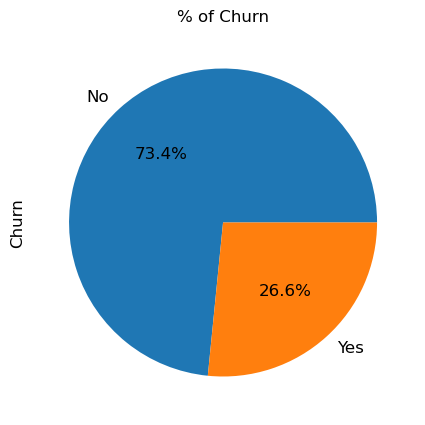

In [29]:
ax = (df['Churn'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('% of Churn', fontsize = 12)

In [ ]:
# numerical feautures

In [30]:
import seaborn as sns 
from matplotlib import pyplot as plt

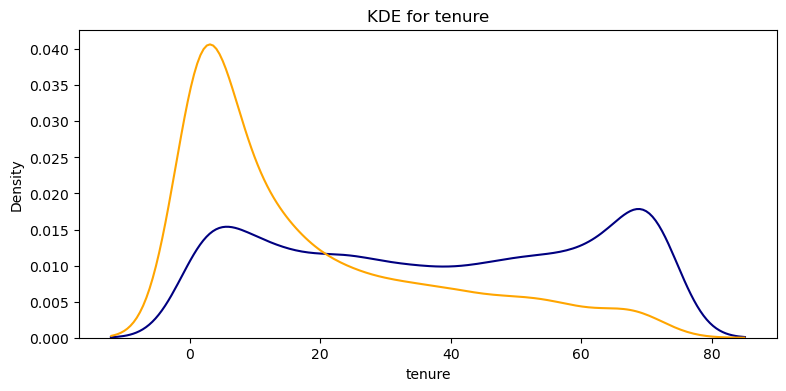

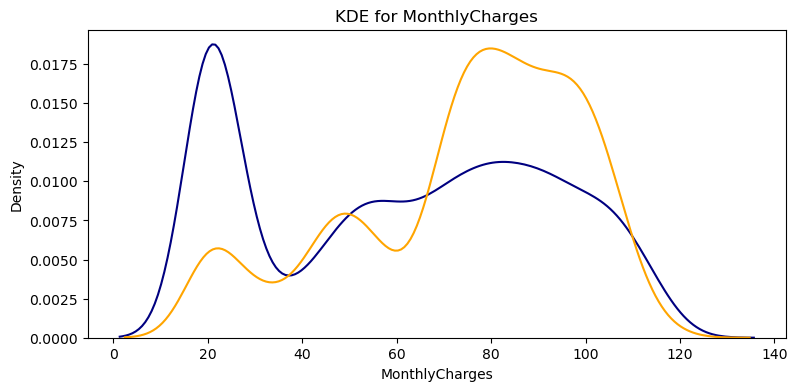

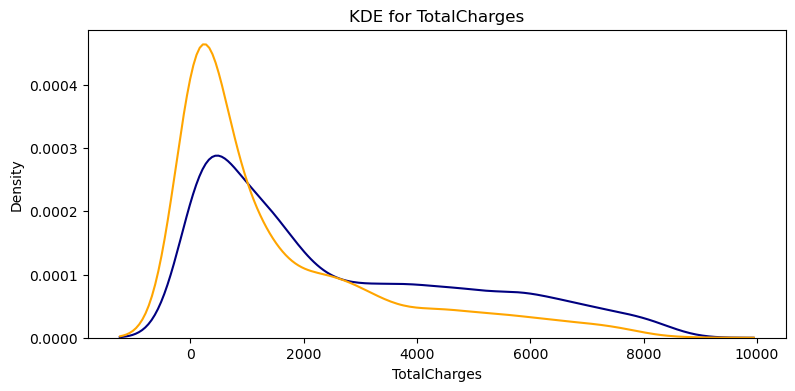

In [31]:
#There are only three numerical columns: tenure, monthly charges and total charges.
#The probability density distribution can be estimate using the seaborn kdeplot function.
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 0][feature], color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df[df['Churn'] == 1][feature], color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1.Recent clients are more likely to churn.

2.Clients with higher MonthlyCharges are also more likely to churn.

3.Tenure and MonthlyCharges are probably important features.

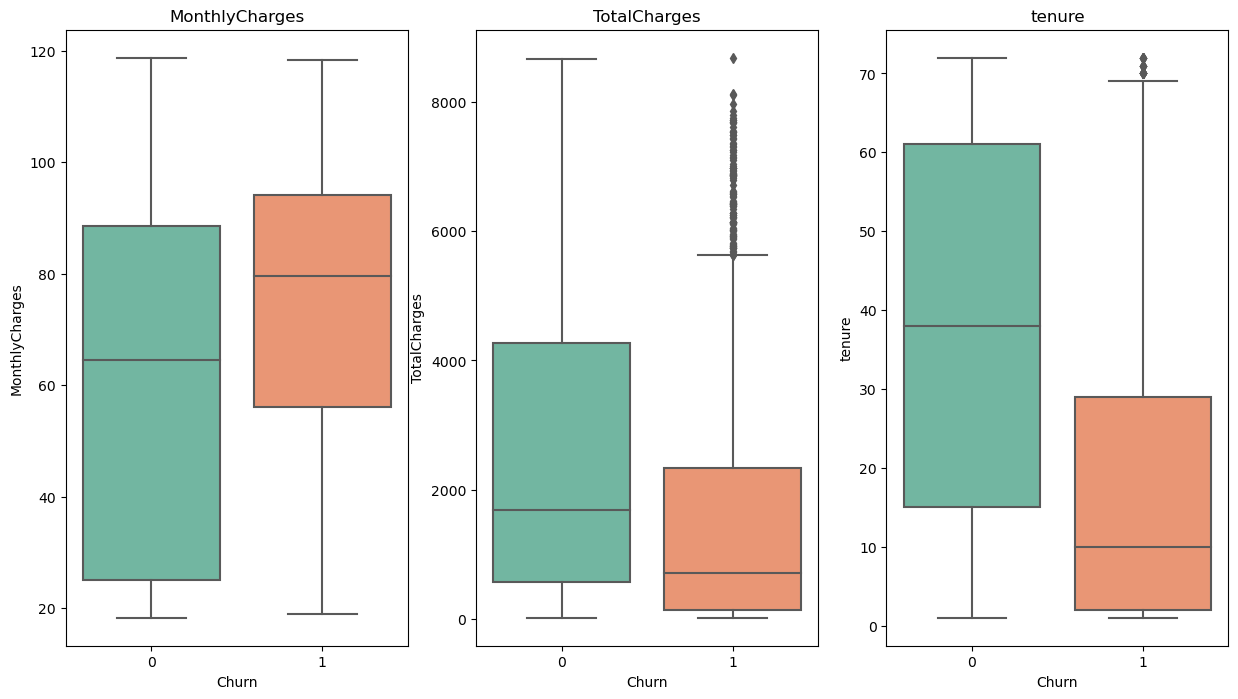

In [32]:
numerical = ["MonthlyCharges", "TotalCharges", "tenure"]

fig, ax = plt.subplots(1, 3, figsize=(15, 8))
for variable, subplot in zip(numerical, ax.flatten()):
    sns.boxplot(x=df["Churn"], y=df[variable], ax=subplot, palette = "Set2").set_title(str(variable))

1.The Monthly plan doesn't seem to be such a big driver of churn, but we can see that 75% of churners pay between 60 and 100 dollars a month

2.One important mark we can see in this plots that 50% of Churners leave the company before the first year goes by.

# Catagorical

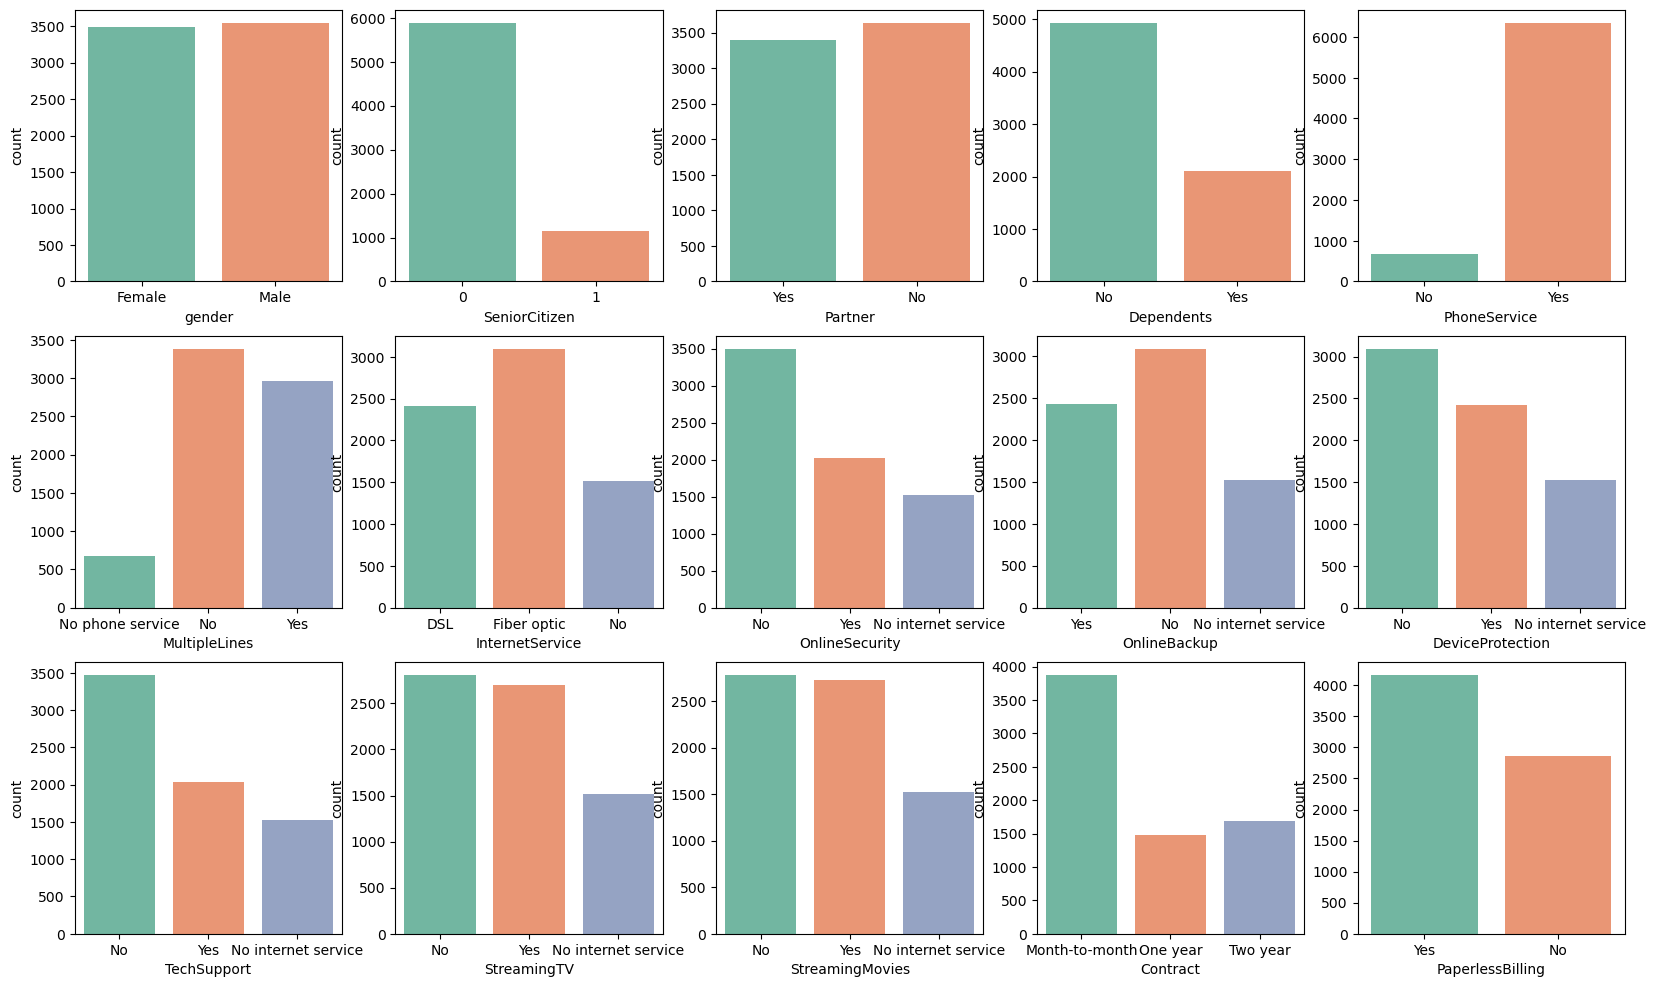

In [40]:
#visualise the distibution of data
categorical = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
               "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
               "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",'PaymentMethod']
fig, ax = plt.subplots(3, 5, figsize=(20, 12))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data=df,x=variable, ax=subplot, palette = "Set2")

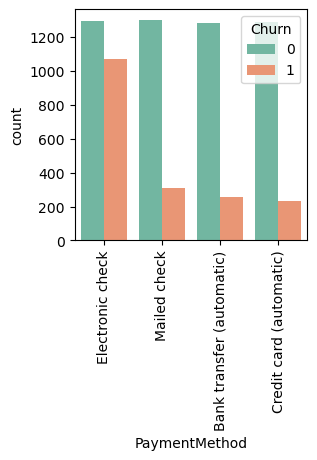

In [45]:
plt.figure(figsize=(3,3))
chart = sns.countplot(data=df,x="PaymentMethod",hue=df["Churn"], palette = "Set2")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [46]:
def stacked_plot(data, features, target):
    fig, ax = plt.subplots(figsize = (6,4))
    df = (data.groupby([features, target]).size()/data.groupby(features)[target].count()).reset_index().pivot(columns=target, index=features, values=0)
    df.plot(kind='bar', stacked=True, ax = ax, color = ["blue", "orange"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(features)
    ax.set_ylabel('Churn Percentage')

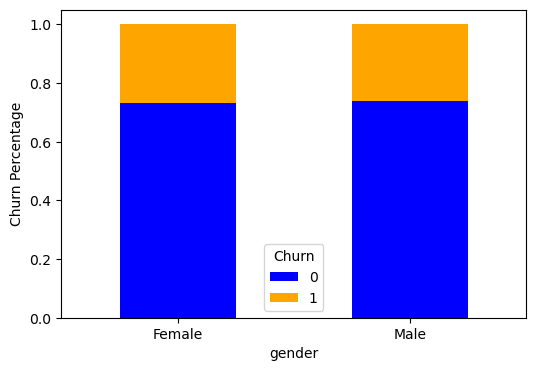

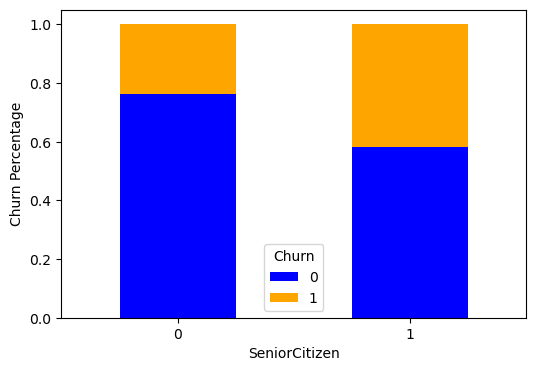

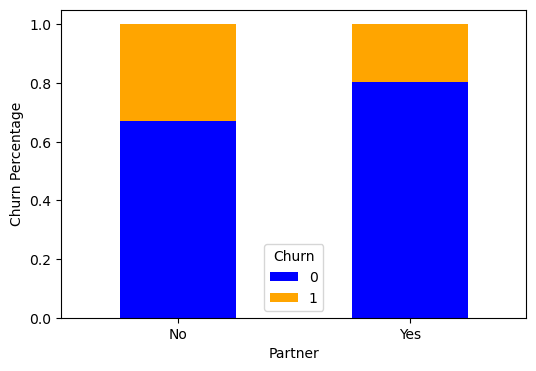

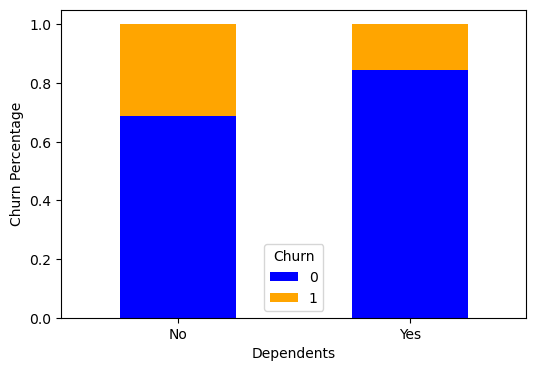

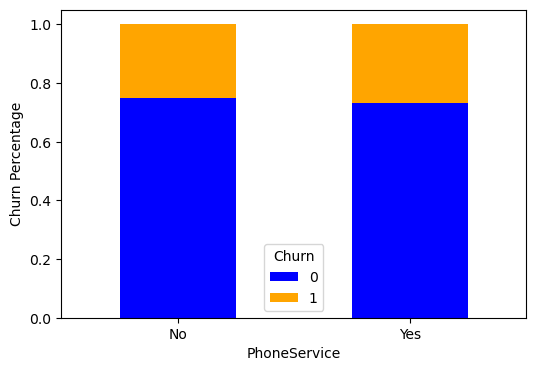

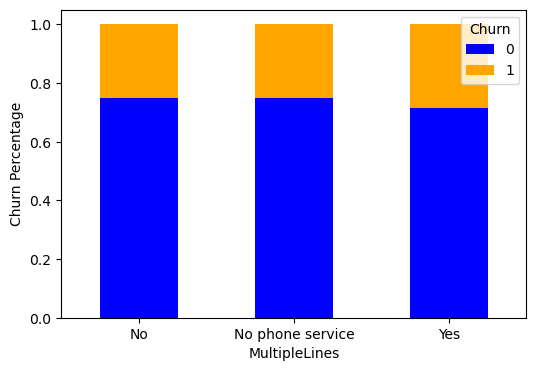

In [50]:
stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")
stacked_plot(df, "PhoneService", "Churn")
stacked_plot(df, "MultipleLines", "Churn")

In [53]:
## phone service, internet service, seniorcitizen
crosstab_cols = [df['PhoneService'], df['SeniorCitizen'], df['InternetService']]
pd.crosstab(df['Churn'], crosstab_cols, dropna=False)


PhoneService      No                                     Yes              \
SeniorCitizen      0                  1                    0               
InternetService  DSL Fiber optic No DSL Fiber optic No   DSL Fiber optic   
Churn                                                                      
0                450           0  0  60           0  0  1326        1361   
1                126           0  0  44           0  0   255         904   

PhoneService                                
SeniorCitizen            1                  
InternetService    No  DSL Fiber optic  No  
Churn                                       
0                1360  121         438  47  
1                 108   34         393   5

In [55]:
## phone service, internet service, gender
crosstab_cols = [df['PhoneService'], df['gender'], df['InternetService']]
pd.crosstab(df['Churn'], crosstab_cols, dropna=False)

PhoneService        No                                       Yes              \
gender          Female                Male                Female               
InternetService    DSL Fiber optic No  DSL Fiber optic No    DSL Fiber optic   
Churn                                                                          
0                  249           0  0  261           0  0    716         889   
1                   80           0  0   90           0  0    139         664   

PhoneService                                
gender               Male                   
InternetService   No  DSL Fiber optic   No  
Churn                                       
0                690  731         910  717  
1                 56  150         633   57

In [57]:
#contract & internet service 
crosstab_cols = [df['Contract'],df['InternetService']]
pd.crosstab(df['Churn'], crosstab_cols)

Contract        Month-to-month                  One year                   \
InternetService            DSL Fiber optic   No      DSL Fiber optic   No   
Churn                                                                       
0                          829         966  425      517         435  354   
1                          394        1162   99       53         104    9   

Contract        Two year                   
InternetService      DSL Fiber optic   No  
Churn                                      
0                    611         398  628  
1                     12          31    5

# Checking for outliers

In [58]:
num_features= ['tenure', 'MonthlyCharges', 'TotalCharges']
df_num = df[num_features]
df_num.describe()

Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR))).any()

tenure            False
MonthlyCharges    False
TotalCharges      False
dtype: bool

#### No outliers in numerical features detected with the IQR method.

# Feature Engineering

In [62]:
np.corrcoef(df.TotalCharges, df.MonthlyCharges*df.tenure)

array([[1.        , 0.99955986],
       [0.99955986, 1.        ]])

In [63]:
df.drop('TotalCharges', axis = 1, inplace = True) #as correlation is high

In [64]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [65]:
df['tenure'].value_counts().head(10)

1     613
72    362
2     238
3     200
4     176
71    170
5     133
7     131
8     123
70    119
Name: tenure, dtype: int64

In [67]:
#to reduce data complexity make 5 groups
def tenure(t):
    if t<=12:
        return 1
    elif t>12 and t<=24:
        return 2
    elif t>24 and t<=36:
        return 3
    elif t>36 and t<=48:
        return 4
    elif t>48 and t<=60:
        return 5
    else:
        return 6

df["tenure_group"]=df["tenure"].apply(lambda x: tenure(x))

In [68]:
df.tenure_group.value_counts()

1    2175
6    1407
2    1024
3     832
5     832
4     762
Name: tenure_group, dtype: int64

In [69]:
df.drop('tenure', axis = 1, inplace = True)#drop as tenure_group is created

<Axes: xlabel='tenure_group', ylabel='count'>

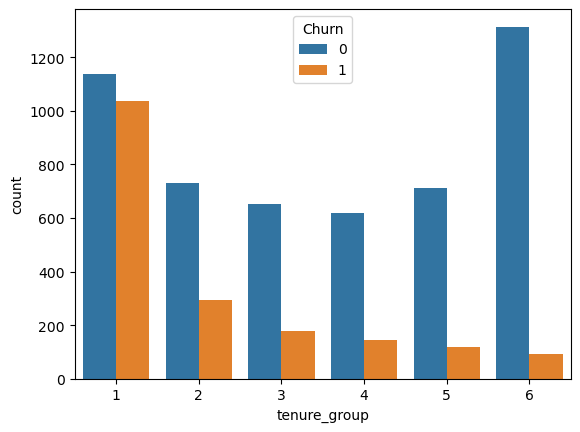

In [71]:
sns.countplot(x="tenure_group", hue="Churn", data=df)

1.As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

2.This also holds true in the log-rank test of survival analysis. So, I will drop them

In [73]:
df.drop(['MultipleLines', 'PhoneService',], axis = 1, inplace = True)

In [74]:
df.drop(['gender'],axis=1,inplace= True) #gender is also not importance

In [75]:
df.drop(['customerID'],axis=1,inplace= True)

In [76]:
df.Partner = df.Partner.apply(lambda x: 0 if x == "No" else 1)
df.Dependents = df.Dependents.apply(lambda x: 0 if x == "No" else 1)
df.PaperlessBilling = df.PaperlessBilling.apply(lambda x: 0 if x == "No" else 1)

df = pd.get_dummies(df, columns=['InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'], drop_first=True)
df.head()

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Feauture selection

#### Feauture Importance

In [79]:
#Create Feature variable X and Target variable y
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

In [80]:
X

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,3,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,4,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,84.80,2,0,0,0,1,...,1,0,1,0,1,1,0,0,0,1
7039,0,1,1,1,103.20,6,1,0,0,0,...,0,0,1,0,1,1,0,1,0,0
7040,0,1,1,1,29.60,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
7041,1,1,0,1,74.40,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [82]:
#Feature selection by Chi2 test
#return F-score and P-value
from sklearn.feature_selection import chi2
F_P_Score=chi2(X_train,y_train)
F_P_Score

(array([ 122.70371489,   67.76676189,  113.48877084,   86.15479262,
        2959.46665472,  786.35956305,  300.51006218,  223.03914968,
         223.03914968,  107.13176711,  223.03914968,   26.46605652,
         223.03914968,   14.09684258,  223.03914968,  104.98241693,
         223.03914968,   11.41371626,  223.03914968,   12.10460772,
         140.71325076,  394.82581373,   94.6969697 ,  367.30285163,
          37.84801136]),
 array([1.61907907e-028, 1.84025698e-016, 1.68633647e-026, 1.66388188e-020,
        0.00000000e+000, 4.98619688e-173, 2.55062323e-067, 1.96556642e-050,
        1.96556642e-050, 4.16533521e-025, 1.96556642e-050, 2.68209778e-007,
        1.96556642e-050, 1.73635004e-004, 1.96556642e-050, 1.23224463e-024,
        1.96556642e-050, 7.29038546e-004, 1.96556642e-050, 5.02973771e-004,
        1.85885289e-032, 7.36729564e-088, 2.21878579e-022, 7.23523498e-082,
        7.64763001e-010]))

In [83]:
#plot importance features based on P-value
P_ranked_features=pd.Series(F_P_Score[1],index=X_train.columns)
P_ranked_features.sort_index(ascending= False)

tenure_group                             4.986197e-173
TechSupport_Yes                           1.232245e-24
TechSupport_No internet service           1.965566e-50
StreamingTV_Yes                           7.290385e-04
StreamingTV_No internet service           1.965566e-50
StreamingMovies_Yes                       5.029738e-04
StreamingMovies_No internet service       1.965566e-50
SeniorCitizen                             1.619079e-28
PaymentMethod_Mailed check                7.647630e-10
PaymentMethod_Electronic check            7.235235e-82
PaymentMethod_Credit card (automatic)     2.218786e-22
Partner                                   1.840257e-16
PaperlessBilling                          1.663882e-20
OnlineSecurity_Yes                        4.165335e-25
OnlineSecurity_No internet service        1.965566e-50
OnlineBackup_Yes                          2.682098e-07
OnlineBackup_No internet service          1.965566e-50
MonthlyCharges                            0.000000e+00
InternetSe

# Correlation Analysis

In [84]:
#correlation
correlation = X_train.corr()
correlation

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.011396,-0.214753,0.145706,0.219678,0.009930,0.255967,-0.183404,-0.183404,-0.043108,...,-0.059475,-0.183404,0.109437,-0.183404,0.117625,-0.049375,-0.119726,-0.014178,0.171542,-0.154184
Partner,0.011396,1.000000,0.462026,-0.009811,0.088757,0.377433,-0.013103,0.005482,0.005482,0.146338,...,0.122176,0.005482,0.126045,0.005482,0.123217,0.090208,0.246070,0.086223,-0.084577,-0.106542
Dependents,-0.214753,0.462026,1.000000,-0.109478,-0.108070,0.160548,-0.164392,0.131517,0.131517,0.098541,...,0.074698,0.131517,-0.016391,0.131517,-0.028609,0.070176,0.205890,0.068752,-0.150093,0.045720
PaperlessBilling,0.145706,-0.009811,-0.109478,1.000000,0.355594,0.003269,0.331070,-0.320657,-0.320657,-0.003391,...,0.041490,-0.320657,0.227490,-0.320657,0.213834,-0.046792,-0.146470,-0.017559,0.215484,-0.208721
MonthlyCharges,0.219678,0.088757,-0.108070,0.355594,1.000000,0.240604,0.787358,-0.764398,-0.764398,0.295038,...,0.341773,-0.764398,0.630208,-0.764398,0.622570,0.002982,-0.068058,0.027521,0.273705,-0.383303
tenure_group,0.009930,0.377433,0.160548,0.003269,0.240604,1.000000,0.014663,-0.038490,-0.038490,0.312899,...,0.316375,-0.038490,0.277646,-0.038490,0.282486,0.209312,0.549094,0.230538,-0.207526,-0.233086
InternetService_Fiber optic,0.255967,-0.013103,-0.164392,0.331070,0.787358,0.014663,1.000000,-0.466301,-0.466301,-0.027573,...,-0.011342,-0.466301,0.330087,-0.466301,0.315126,-0.078312,-0.206883,-0.052868,0.342619,-0.309536
InternetService_No,-0.183404,0.005482,0.131517,-0.320657,-0.764398,-0.038490,-0.466301,1.000000,1.000000,-0.332443,...,-0.334620,1.000000,-0.416258,1.000000,-0.420649,0.043033,0.208942,0.001098,-0.285475,0.326919
OnlineSecurity_No internet service,-0.183404,0.005482,0.131517,-0.320657,-0.764398,-0.038490,-0.466301,1.000000,1.000000,-0.332443,...,-0.334620,1.000000,-0.416258,1.000000,-0.420649,0.043033,0.208942,0.001098,-0.285475,0.326919
OnlineSecurity_Yes,-0.043108,0.146338,0.098541,-0.003391,0.295038,0.312899,-0.027573,-0.332443,-0.332443,1.000000,...,0.337245,-0.332443,0.169455,-0.332443,0.186038,0.098734,0.188943,0.111006,-0.115981,-0.079433


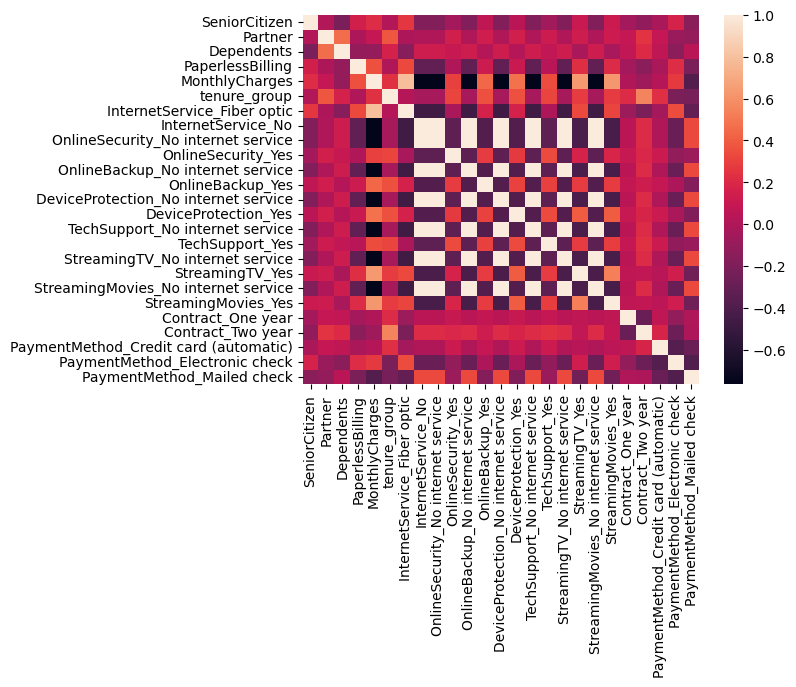

In [86]:
sns.heatmap(X_train.corr())
plt.show()

In [87]:
threshold=0.9
#find correlated Features
def correlation(X_train, threshold):
    col_corr=set()   #set all correlated col names
    corr_matrix=X_train.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold:  #we are interested in absoulute coeff value
                colname= corr_matrix.columns[i]   #get the name of col
                col_corr.add(colname)
    return col_corr            
                
            

In [89]:
correlation(df.iloc[:,:],threshold)

{'DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'}

In [90]:
df.drop(['DeviceProtection_No internet service',
 'OnlineBackup_No internet service',
 'OnlineSecurity_No internet service',
 'StreamingMovies_No internet service',
 'StreamingTV_No internet service',
 'TechSupport_No internet service'],axis=1,inplace= True)#Remove  highly corelated Features.

In [91]:
from sklearn.feature_selection import mutual_info_classif

In [92]:
mutual_info=mutual_info_classif(X_train,y_train)

In [93]:
mutual_data=pd.Series(mutual_info,index=X_train.columns)
mutual_data.sort_values(ascending=False)

tenure_group                             0.065265
Contract_Two year                        0.057333
InternetService_Fiber optic              0.051674
PaymentMethod_Electronic check           0.045177
MonthlyCharges                           0.043962
StreamingTV_No internet service          0.037575
OnlineBackup_No internet service         0.036436
StreamingMovies_No internet service      0.034739
InternetService_No                       0.034045
OnlineSecurity_No internet service       0.032177
DeviceProtection_No internet service     0.026961
TechSupport_No internet service          0.024793
Dependents                               0.020132
PaperlessBilling                         0.019597
Contract_One year                        0.019352
Partner                                  0.018353
TechSupport_Yes                          0.016059
OnlineSecurity_Yes                       0.007694
PaymentMethod_Credit card (automatic)    0.004186
SeniorCitizen                            0.003606


tenure_group (0.065202):

This feature has the highest mutual information score among the listed features,
indicating that it provides the most information about the target variable.
It is likely an important feature for your model.

#### Scaling independent data only for KNN and SVM algorithms

In [101]:
X_train_Nm,X_test_Nm,y_train_Nm,y_test_Nm=train_test_split(X,y,train_size=0.8,random_state=0)#for over sampling cheak

In [102]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
#scaling for train SVM & KNN Classifier
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train_scaled

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

# Cross Validation Like KFOLD and Hyperpaqrameter Tuning in Imbalance data

# Logistic Regression Imbalaced

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [112]:
logit=LogisticRegression(random_state=50)

grid={'C':10.0 **np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=10,random_state=None,shuffle=False)


In [115]:
logit=GridSearchCV(logit,grid,cv=cv,n_jobs=-1,scoring='recall')
logit.fit(X_train,y_train)

C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\linear_

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LogisticRegression(random_state=50), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [132]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score
y_pred=logit.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print("accuracy_score:",accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("roc_auc_score:",roc_auc_score(y_test,y_pred))

[[926 112]
 [182 187]]

accuracy_score: 0.7910447761194029

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1038
           1       0.63      0.51      0.56       369

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407

roc_auc_score: 0.6994376302144525


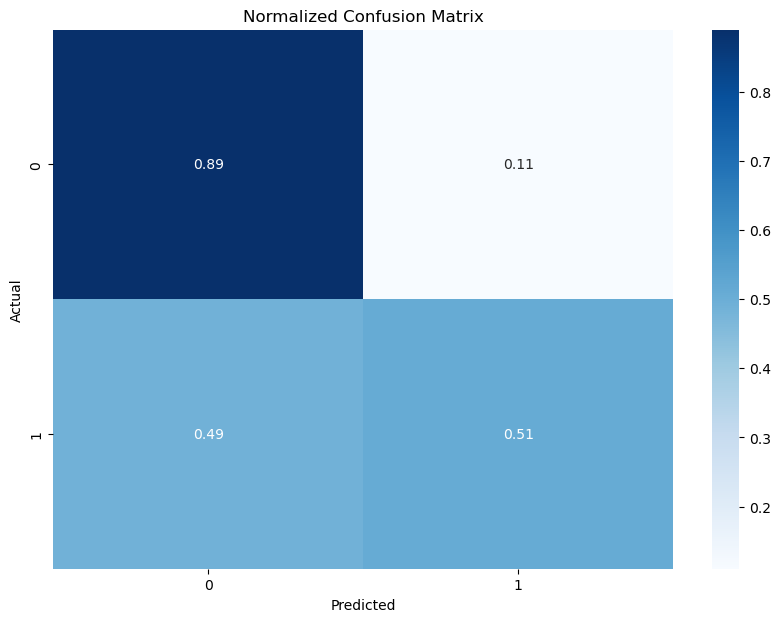

accuracy_score: 0.7910447761194029


In [140]:
cm = confusion_matrix(y_test, y_pred)


actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm / actual, 2)


plt.figure(figsize=(10, 7))
sns.heatmap(cmn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()
print("accuracy_score:",accuracy_score(y_test,y_pred))



In [138]:
y_pred_prob = logit.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, y_pred_prob[:,1])))

Logistic test roc-auc: 0.831461378197597


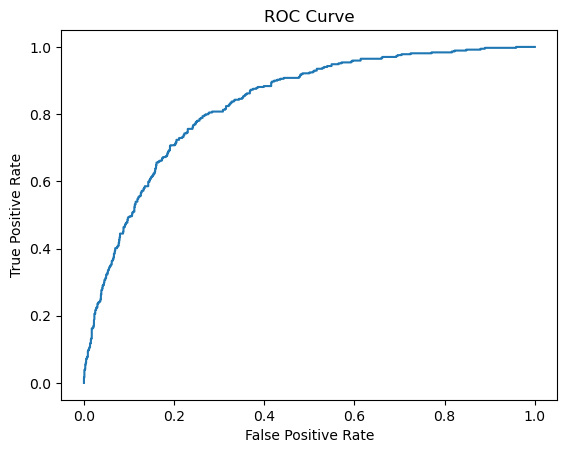

In [139]:
fpr, tpr, thresholds = roc_curve(y_test, prob)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Random Forest

In [144]:
# Create the parameter grid based on the results of random search 
from sklearn.ensemble import RandomForestClassifier
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 15, 20, 30],
    'n_estimators': [20,50,100, 200, 300]
}
# Create a based model
rf_C = RandomForestClassifier()
# Instantiate the grid search model
RF_model = GridSearchCV(estimator = rf_C, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)
RF_model .fit(X_train,y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 15, 20, 30],
                         'n_estimators': [20, 50, 100, 200, 300]},
             verbose=2)

In [145]:
RF_model.best_estimator_

RandomForestClassifier(max_depth=10)

In [149]:
y_pred=RF_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print("accuracy_score:",accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[941  97]
 [192 177]]

accuracy_score: 0.7945984363894811

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.65      0.48      0.55       369

    accuracy                           0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



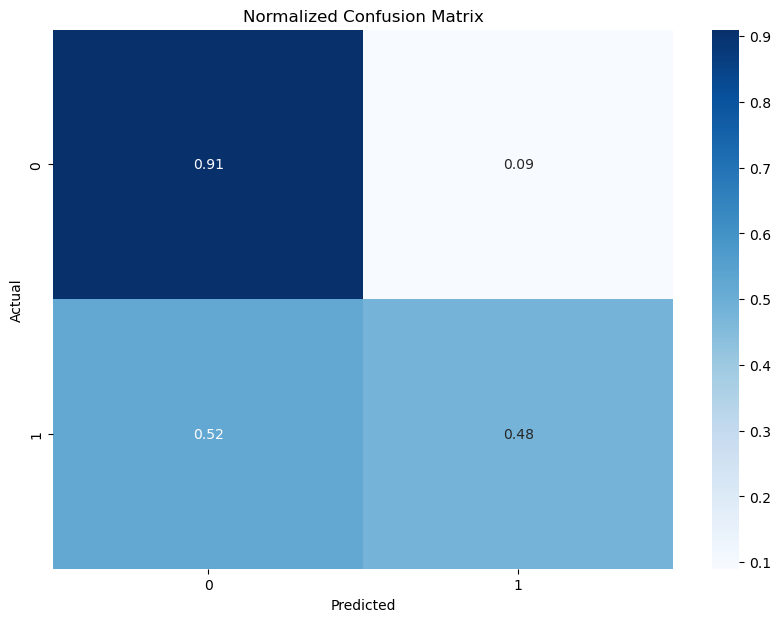

accuracy_score: 0.7945984363894811


In [153]:

cm = confusion_matrix(y_test, y_pred)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm / actual, 2)
plt.figure(figsize=(10, 7))
sns.heatmap(cmn, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()
print("accuracy_score:",accuracy_score(y_test,y_pred))

# Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
param_g = {
    'max_depth': [8, 15, 30, 50],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
}
    
ds=DecisionTreeClassifier()
ds = GridSearchCV(estimator = ds, param_grid = param_g, 
                          cv = 10, n_jobs = -1, verbose = 2)
ds.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 15, 30, 50], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12]},
             verbose=2)

In [157]:
ds.best_estimator_

DecisionTreeClassifier(max_depth=15, max_features=3, min_samples_leaf=4,
                       min_samples_split=12)

In [156]:
y_pred=ds.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print("accuracy_score:",accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))


[[906 132]
 [189 180]]

accuracy_score: 0.7718550106609808

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1038
           1       0.58      0.49      0.53       369

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



# BaggingClassifier

In [159]:
from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(random_state=124)
BGC=bgc.fit(X_train,y_train)

In [160]:
y_pred=ds.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print("accuracy_score:",accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

[[906 132]
 [189 180]]

accuracy_score: 0.7718550106609808

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1038
           1       0.58      0.49      0.53       369

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.77      1407



# SVM

In [165]:
from sklearn.svm import SVC
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
svm=SVC()
grid = GridSearchCV(svm, param_grid, refit = True, verbose = 3) 
grid.fit(X_train_Nm,y_train_Nm) #X_train_Nm,X_test_Nm,y_train_Nm,y_test_Nm

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   4.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   4.7s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.735 total time=   4.7s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.732 total time=   4.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.734 total time=   4.6s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.796 total time=   2.3s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.778 total time=   2.2s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.774 total time=   2.3s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.797 total time=   2.3s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time=   2.2s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.794 total time=   1.9s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=  13.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.757 total time=  15.1s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.748 total time=  14.3s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.764 total time=   6.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.718 total time=  12.2s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.717 total time=  11.7s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.724 total time=  10.9s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.732 total time=   9.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.724 total time=   6.6s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.772 total time=  10.1s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.748 total time=  10.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.767 total time=   9.4s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [168]:
svc=grid.best_estimator_

In [169]:
y_pred=svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print()
print("accuracy_score:",accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))


[[926 112]
 [187 182]]

accuracy_score: 0.7874911158493249

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1038
           1       0.62      0.49      0.55       369

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



# All Scores

In [175]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [176]:
def print_scores(headline, y_test, y_pred):
    print(headline)
    acc_score = accuracy_score(y_test, y_pred)
    print("accuracy: ",acc_score)
    pre_score = precision_score(y_test, y_pred)
    print("precision: ",pre_score)
    rec_score = recall_score(y_test, y_pred)                            
    print("recall: ",rec_score)
    f_score = f1_score(y_test, y_pred, average='weighted')
    print("f1_score: ",f_score)
    r_auc_score = roc_auc_score(y_test, y_pred)
    print("roc auc_score: ",r_auc_score)

In [182]:
print_scores("Logistic Regression;",y_test, logit.predict(X_test))
print("-"*50)
print_scores("SVC;",y_test, grid.predict(X_test_scaled))
print("-"*50)
print_scores("Decision Tree;",y_test, ds.predict(X_test))
print("-"*50)
print_scores("Random Forest;",y_test, RF_model.predict(X_test))
print("-"*50)
print_scores("Bagging Classifier;",y_test, bgc.predict(X_test))

Logistic Regression;
accuracy:  0.7910447761194029
precision:  0.6254180602006689
recall:  0.5067750677506775
f1_score:  0.7835044603869281
roc auc_score:  0.6994376302144525
--------------------------------------------------


C:\Users\ravinder\.jupyter\programmes\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


SVC;
accuracy:  0.7313432835820896
precision:  0.45794392523364486
recall:  0.13279132791327913
f1_score:  0.6724592956317391
roc auc_score:  0.5384573209893949
--------------------------------------------------
Decision Tree;
accuracy:  0.7718550106609808
precision:  0.5769230769230769
recall:  0.4878048780487805
f1_score:  0.7653554433767016
roc auc_score:  0.6803186239954885
--------------------------------------------------
Random Forest;
accuracy:  0.7945984363894811
precision:  0.6459854014598541
recall:  0.4796747967479675
f1_score:  0.783918961158688
roc auc_score:  0.693112928239109
--------------------------------------------------
Bagging Classifier;
accuracy:  0.7704335465529495
precision:  0.5864661654135338
recall:  0.42276422764227645
f1_score:  0.7572408979622172
roc auc_score:  0.6583956012970535


In [183]:
df

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure_group,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,29.85,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,56.95,0,3,0,0,1,0,1,0,0,0,1,0,0,0,1
2,0,0,0,1,53.85,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,42.30,0,4,0,0,1,0,1,1,0,0,1,0,0,0,0
4,0,0,0,1,70.70,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,84.80,0,2,0,0,1,0,1,1,1,1,1,0,0,0,1
7039,0,1,1,1,103.20,0,6,1,0,0,1,1,0,1,1,1,0,1,0,0
7040,0,1,1,1,29.60,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
7041,1,1,0,1,74.40,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1


### **Is this the BEST MODEL?**

1. High train_score, indicating that the algorithm effectively learned from the training data.
2. High test_score, suggesting that the model generalizes well when applied to unseen testing data.


It is imperative to conduct a thorough evaluation of model performance to determine the optimal solution. While the initial assessment reveals promising characteristics such as high train and test scores, it is essential to delve deeper into additional factors to ascertain the best model for the task at hand.

**Key Considerations:**

1. **Model Size**: Assessing the complexity and resource requirements of the model is crucial. A larger model size may indicate increased computational overhead and storage requirements.

2. **Training Time**: Evaluating the time taken to train the model provides insights into computational efficiency and resource utilization during the training phase. Minimizing training time is essential for scalable and efficient model development.

3. **Prediction Time**: Examining the speed and efficiency of model predictions in real-world scenarios is paramount. Models with faster prediction times are more suitable for deployment in production environments.

By meticulously considering these additional criteria alongside traditional performance metrics, we can make a more informed decision regarding the suitability and effectiveness of the model.

**Identified Problems:**

In addition to evaluating model performance, it is essential to address underlying issues in the current approach:

1. **Efficiency**: The current code may lack efficiency, potentially leading to suboptimal performance and resource utilization.

2. **Reproducibility**: Ensuring reproducibility is essential for maintaining consistency and reliability across different environments and datasets.

3. **Scalability**: Scalability is paramount for accommodating larger datasets and increasing computational demands as the project evolves.

**Answering Key Questions:**

1. **Algorithm Flexibility**: The number of algorithms that can be applied is crucial for exploring various modeling approaches and selecting the most suitable one.

2. **Model Variability**: Each algorithm's ability to generate more than one model enables comprehensive exploration of hyperparameters and configurations, facilitating model optimization.

3. **Data Preprocessing Techniques**: The capability to apply diverse data preprocessing techniques enhances the model's adaptability and robustness to different types of data.

**Exploring Permutations and Combinations:**

Considering all possible combinations of algorithms, model variations, and data preprocessing techniques allows for a comprehensive exploration of the solution space. This exhaustive analysis is essential for identifying the most effective model configuration that meets project requirements and objectives.

## **Introducing Pipelines for Optimal Workflow**

Pipelines help improve the efficiency, reproducibility, and scalability of the machine learning workflow by automating and standardizing common tasks and processes. They also promote cleaner and more modular code, making it easier to maintain and extend machine learning models over time.

**How does Pipeline work?**  
Pipeline allows you to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

Intermediate steps of the pipeline must be ‘transformers’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

Pipelines are important because 
1. **Efficient Hyperparameter Tuning:** Using pipelines also allows for hyperparameter tuning and cross-validation to be performed more efficiently, as the entire pipeline can be treated as a single estimator. This makes it easier to search over a space of hyperparameters and evaluate different configurations. Overall, pipelines promote code modularity, reusability, and reproducibility in machine learning projects.
2. **Automate ML Workflows:** They help automate machine learning workflows by sequentially applying a series of preprocessing steps followed by a model fitting step. This ensures that all preprocessing steps are applied consistently to both the training and testing data, avoiding data leakage and making the code more readable and maintainable.

## PipeLines:
#### **Creating an Optimal Workflow**

    1.Fast
    
    2.Memory Efficient
    
    3.No room for any mistakes

    

In [188]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [197]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")


# Putting it all together: Implementing various Algorithms to find the Best Model


In [263]:
df

,SeniorCitizen,Partner,Dependents,PaperlessBilling,MonthlyCharges,Churn,tenure,InternetService,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,0,Yes,No,Yes,29.85,No,1,DSL,No,No,No,No,No,Month-to-month,Electronic check
1,0,No,No,No,56.95,No,34,DSL,Yes,Yes,No,No,No,One year,Mailed check
2,0,No,No,Yes,53.85,Yes,2,DSL,Yes,No,No,No,No,Month-to-month,Mailed check
3,0,No,No,No,42.30,No,45,DSL,Yes,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,0,No,No,Yes,70.70,Yes,2,Fiber optic,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,Yes,84.80,No,24,DSL,Yes,Yes,Yes,Yes,Yes,One year,Mailed check
7039,0,Yes,Yes,Yes,103.20,No,72,Fiber optic,No,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,0,Yes,Yes,Yes,29.60,No,11,DSL,Yes,No,No,No,No,Month-to-month,Electronic check
7041,1,Yes,No,Yes,74.40,Yes,4,Fiber optic,No,No,No,No,No,Month-to-month,Mailed check


In [264]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer

In [265]:
X = df.drop(['Churn'], axis = 1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


pipelines = {
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'decision_tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]),
    'gradient_boosting': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])
}


param_grids = {
    'logistic_regression': [
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga'],
            'classifier__class_weight': ['balanced']
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 5, 10],
            'classifier__class_weight': ['balanced']
        }
    ],
    'gradient_boosting': [
        {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__learning_rate': [0.01, 0.1, 0.5],
            'classifier__max_depth': [3, 5, 10]
        }
    ],
    'naive_bayes': [{}]
}

best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    %time grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))


********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 30.9 s
Wall time: 14 s
Score on Test Data:  0.7551454932576295
********** decision_tree **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 1.12 s
Wall time: 1.1 s
Score on Test Data:  0.8005677785663591
********** random_forest **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 22.9 s
Wall time: 27.2 s
Score on Test Data:  0.7814052519517388
********** gradient_boosting **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 4min 21s
Wall time: 5min 8s
Score on Test Data:  0.8097941802696949
********** naive_bayes **********
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: total: 281 ms
Wall time: 308 ms
Score on Test Data:  0.6983676366217175


In [266]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

logistic_regression
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'MonthlyCharges', 'tenure'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Partner', 'Dependents', 'PaperlessBilling', 'InternetService',
       'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod'],
      dtype='object'))])),
                ('classifier',
                 LogisticRegression(C=10, class_we

# Save the model

In [269]:
import joblib
import os
for name, model in best_models.items():
    print("*"*10, name, "*"*10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = model.predict(X_test)
    print("Accuracy Score", metrics.accuracy_score(y_test,  y_test_pred ))
    
    print("Model Size:", os.path.getsize(f'best_models/{name}.pkl'), "Bytes")

********** logistic_regression **********
CPU times: total: 0 ns
Wall time: 10.6 ms
Accuracy Score 0.7551454932576295
Model Size: 8103 Bytes
********** decision_tree **********
CPU times: total: 0 ns
Wall time: 1.78 ms
Accuracy Score 0.8005677785663591
Model Size: 13121 Bytes
********** random_forest **********
CPU times: total: 31.2 ms
Wall time: 19.7 ms
Accuracy Score 0.7814052519517388
Model Size: 11180168 Bytes
********** gradient_boosting **********
CPU times: total: 62.5 ms
Wall time: 15.6 ms
Accuracy Score 0.8097941802696949
Model Size: 107356 Bytes
********** naive_bayes **********
CPU times: total: 15.6 ms
Wall time: 15.6 ms
Accuracy Score 0.6983676366217175
Model Size: 8655 Bytes


In [274]:

data = {
    'Model': ['logistic_regression', 'decision_tree', 'random_forest', 'gradient_boosting', 'naive_bayes'],
    'CPU times (ms)': [0, 0, 31.2, 62.5, 15.6],
    'Accuracy Score': [0.7551454932576295, 0.8005677785663591, 0.7814052519517388, 0.8097941802696949, 0.6983676366217175],
    'Model Size (Bytes)': [8103, 13121, 11180168, 107356, 8655]
}


df = pd.DataFrame(data)

print(df)


                 Model  CPU times (ms)  Accuracy Score  Model Size (Bytes)
0  logistic_regression             0.0        0.755145                8103
1        decision_tree             0.0        0.800568               13121
2        random_forest            31.2        0.781405            11180168
3    gradient_boosting            62.5        0.809794              107356
4          naive_bayes            15.6        0.698368                8655


In [275]:
df

,Model,CPU times (ms),Accuracy Score,Model Size (Bytes)
0,logistic_regression,0.0,0.755145,8103
1,decision_tree,0.0,0.800568,13121
2,random_forest,31.2,0.781405,11180168
3,gradient_boosting,62.5,0.809794,107356
4,naive_bayes,15.6,0.698368,8655
